# Modelo que toma en cuenta la estacionalidad

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## SARMA

Toma en cuenta un retorno más lejano basado en la estacionalidad

$x_{t}=c+βY +ϕ_{1} x_{t-1}+θ _{1} ϵ _{t-1}+ Φ_{1}(x_{t-12}+ϕ_{1} x_{t-13}) + Θ_{1}(ϵ _{t-12}+θ _{1} ϵ _{t-13}) +ϵ_{t}$

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)
df = df.asfreq('h')

In [ ]:
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)

Un retraso de 24 horas para el valor de x y para los residuos.

In [ ]:
model_sarma = SARIMAX(df['SRGLOAVG1H'], order = (2,0,3), seasonal_order = (1,0,1,24))
results_ret_sarma = model_sarma.fit()

In [ ]:
start = df.shape[0]
end = start+(24*7)

In [ ]:
df_pred = results_ret_sarma.predict(start = start, end = end)

In [ ]:
df_show_pred = df_pred.between_time('07:00:00','18:00:00')
df_show_test = df_test.between_time('07:00:00','18:00:00')

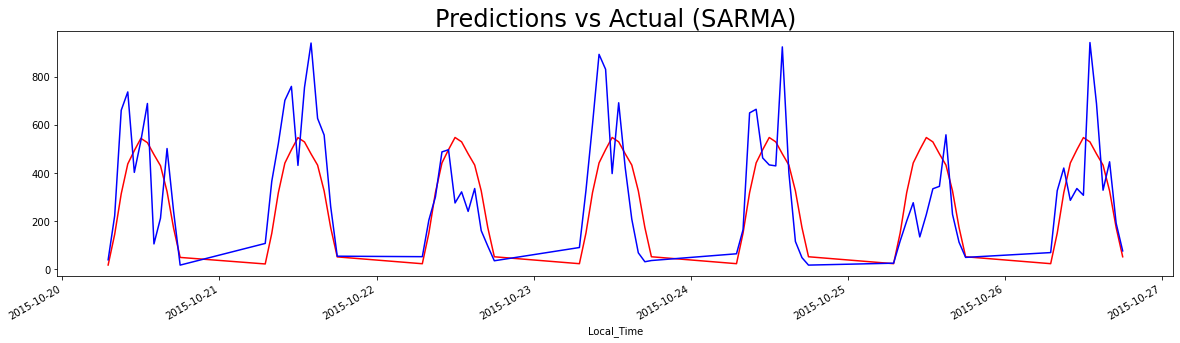

In [ ]:
df_show_pred.plot(figsize = (20,5), color = "red")
df_show_test.iloc[:12*7]['SRGLOAVG1H'].plot(color = "blue")
plt.title("Predictions vs Actual (SARMA)", size = 24)
plt.show()

In [ ]:
results_ret_sarma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         SRGLOAVG1H   No. Observations:                 7008
Model:             SARIMAX(2, 0, 3)x(1, 0, 1, 24)   Log Likelihood              -42100.873
Date:                            Fri, 24 Dec 2021   AIC                          84217.746
Time:                                    18:51:55   BIC                          84272.585
Sample:                                01-01-2015   HQIC                         84236.642
                                     - 10-20-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3336      0.036     36.751      0.000       1.262       1.405
ar.L2         -0.3710      0.029    -12.910      0.000      -0.427      -0.315
ma.L1         -0.6544      0.036    -18.196      0.000      -0.725      -0.584
ma.L2         -0.1215      0.014     -8.870      0.000      -0.148      -0.095
ma.L3         -0.0912      0.015     -6.117      0.000      -0.120      -0.062
ar.S.L24       0.9997   9.76e-05   1.02e+04      0.000       1.000       1.000
ma.S.L24      -0.9893      0.002   -575.668      0.000      -0.993      -0.986
sigma2      1.195e+04    143.171     83.447      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (Q):                      482.81   Jarque-Bera (JB):             10132.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""